# Predicting Customer Credit Default

#identify which customer attributes relate significantly to customer default #rates and to build a predictive model #that Credit One can use to better #classify potential customers as being ‘at-risk’, compared to previously #implemented models. We will use machine learning regression methods in #Python for this task.

# Attribute Information:

#This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study #reviewed the literature and used the following 23 variables as explanatory variables:
#X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family ####(supplementary) credit.
#X2: Gender (1 = male; 2 = female).
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others). X4: Marital status (1 = #married; 2 = single; 3 = divorce; 0=others).
#X5: Age (year).
#X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as #follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the #repayment status in April, 2005.
#The measurement scale for the repayment status is:
#-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment #delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
#X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of #bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
#X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in #August, 2005; . . .;X23 = amount paid in April, 2005.
#Y: client's behavior; Y=0 then not default, Y=1 then default"

# Import Packages

In [1]:
# DS Basics
import numpy as np
import pandas as pd
import scipy
from math import sqrt
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns; sns.set()

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation

from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#from sklearn.metrics import precision_recallFscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#rf_y_predictions rf.predict(X_test)
#rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
#print(rf_roc_auc)
#import os
#print(os.listdir("../input"))

from sklearn.datasets import make_classification 
#from sklearn.learning_curve import learning_curve 
#from sklearn.cross_validation import train_test_split 
#from sklearn.grid_search import GridSearchCV
#from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score

# 1 Import Data

In [2]:
rawData = pd.read_csv('credit1_extract_data_out.csv')
rawData.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,440000,male,graduate school,1,79,0,0,0,0,...,447112,438187,447543,15715,16519,16513,15800,16531,15677,not default
1,1,250000,female,university,1,75,0,-1,-1,-1,...,1010,5572,794,1631,1536,1010,5572,794,1184,not default
2,2,180000,male,graduate school,1,75,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,default
3,3,210000,male,university,1,75,0,0,0,0,...,203776,205901,210006,9700,8810,9000,7300,7500,7600,not default
4,4,160000,female,high school,1,74,0,0,0,-1,...,16905,0,19789,3783,2268,16905,0,19789,26442,not default


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29730 entries, 0 to 29729
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  29730 non-null  int64 
 1   LIMIT_BAL                   29730 non-null  int64 
 2   SEX                         29730 non-null  object
 3   EDUCATION                   29730 non-null  object
 4   MARRIAGE                    29730 non-null  int64 
 5   AGE                         29730 non-null  int64 
 6   PAY_0                       29730 non-null  int64 
 7   PAY_2                       29730 non-null  int64 
 8   PAY_3                       29730 non-null  int64 
 9   PAY_4                       29730 non-null  int64 
 10  PAY_5                       29730 non-null  int64 
 11  PAY_6                       29730 non-null  int64 
 12  BILL_AMT1                   29730 non-null  int64 
 13  BILL_AMT2                   29730 non-null  in

In [4]:
rawData.shape

(29730, 25)

In [5]:
#features
X=rawData.iloc[:,[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4
0,1,79,0,0,0,0,0,0,429309,437906,447326,447112,438187,447543,15715,16519,16513,15800
1,1,75,0,-1,-1,-1,-1,-1,52874,1631,1536,1010,5572,794,1631,1536,1010,5572
2,1,75,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0
3,1,75,0,0,0,0,0,0,205601,203957,199882,203776,205901,210006,9700,8810,9000,7300
4,1,74,0,0,0,-1,-1,-1,79201,69376,66192,16905,0,19789,3783,2268,16905,0


In [6]:
rawData['default payment next month']= rawData['default payment next month'].map({'not default':int(0),'default':int(1)})

In [7]:
y=rawData['default payment next month']
y

0        0
1        0
2        1
3        0
4        0
        ..
29725    0
29726    0
29727    0
29728    0
29729    0
Name: default payment next month, Length: 29730, dtype: int64

In [8]:
rawData['EDUCATION'] = rawData['EDUCATION'].map({'graduate school':int(1),'university':int(2),'high school':int(3)})                                               

In [9]:
rawData['SEX'] = rawData['SEX'].map({'Male':int(1),'Female':int(2)})

In [10]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29730 entries, 0 to 29729
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  29730 non-null  int64  
 1   LIMIT_BAL                   29730 non-null  int64  
 2   SEX                         0 non-null      float64
 3   EDUCATION                   29264 non-null  float64
 4   MARRIAGE                    29730 non-null  int64  
 5   AGE                         29730 non-null  int64  
 6   PAY_0                       29730 non-null  int64  
 7   PAY_2                       29730 non-null  int64  
 8   PAY_3                       29730 non-null  int64  
 9   PAY_4                       29730 non-null  int64  
 10  PAY_5                       29730 non-null  int64  
 11  PAY_6                       29730 non-null  int64  
 12  BILL_AMT1                   29730 non-null  int64  
 13  BILL_AMT2                   297

# Preprocessing

In [11]:
#dependent variable
print(y)

0        0
1        0
2        1
3        0
4        0
        ..
29725    0
29726    0
29727    0
29728    0
29729    0
Name: default payment next month, Length: 29730, dtype: int64


In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
model = LinearRegression()

In [14]:
print(cross_val_score(model, X, y, cv=3))

[0.12504375 0.09995771 0.13083867]


In [15]:
algosClass = []

In [16]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [17]:
algosClass.append(('Linear Regression',LinearRegression()))

In [18]:
algosClass.append(('Support Vector Regression',SVR()))

In [19]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv=5, scoring = 'r2')
    names.append(name)
    results.append(result)

In [20]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.15887050192876923
Linear Regression 0.11871397358363608
Support Vector Regression -0.08647841512991201


In [21]:
#Initiate the test_train split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [22]:
y_train

19375    0
1606     0
11670    0
12840    0
22843    0
        ..
21575    0
5390     1
860      0
15795    0
23654    0
Name: default payment next month, Length: 23784, dtype: int64

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23784, 18)
(5946, 18)
(23784,)
(5946,)


In [24]:
algo = LinearRegression()

In [25]:
model = algo.fit(X_train,y_train)

In [26]:
predictions = model.predict(X_test)
predictions

array([0.4431677 , 0.21991856, 0.14350891, ..., 0.25895718, 0.24288127,
       0.20127078])

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
from math import sqrt

In [29]:
rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

0.3868287665965174

In [30]:
predRsquared = r2_score(y_test,predictions)
predRsquared

0.13455782573073205

In [31]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('y_test:',y_test)
print('predictions:',predictions)

R Squared: 0.135
RMSE: 0.387
y_test: 18346    1
8223     0
17189    0
7174     0
13449    0
        ..
1866     1
8665     1
7071     0
124      0
451      1
Name: default payment next month, Length: 5946, dtype: int64
predictions: [0.4431677  0.21991856 0.14350891 ... 0.25895718 0.24288127 0.20127078]


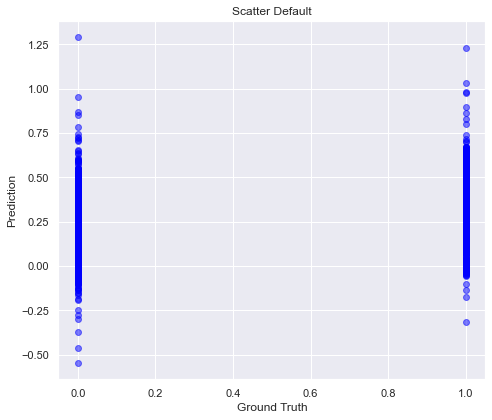

In [32]:
#plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
#plt.xlabel('Ground Truth')
#plt.ylabel('Predictions')
#plt.show();

plt.figure(figsize=(7, 6))
plt.scatter(y_test,predictions,c= ['blue'] ,linewidth=1,alpha=0.5)
#plt.scatter(y_test,predictions,c= ['blue'] ,linewidth=1,alpha=0.5,edgecolor='black',s=200)
plt.title("Scatter Default")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.tight_layout()
plt.show();

 ...]

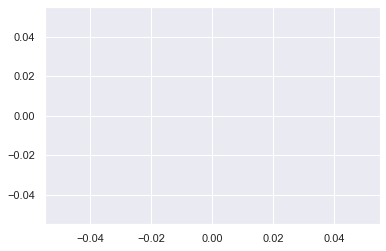

In [33]:
plt.plot(X - y, marker= 'o' ,linestyle = '', color = 'blue', alpha = 0.5)

In [34]:
##Random Forest Classifier##
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=30)
classifier.fit(X_train, y_train)
y_train = classifier.predict(X_test)
#predictions = modelRF.predict(X_test)

In [35]:
from sklearn import metrics

In [36]:
accuracy = metrics.accuracy_score(y_test,y_train)
print ("The model has an accuracy of", round(accuracy,2)*100,"%")

The model has an accuracy of 81.0 %


In [37]:
###The accuracy for Random Forest is 81% which proves as best fit model

In [38]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('y_test:',y_test)
print('predictions:',predictions)

R Squared: 0.135
RMSE: 0.387
y_test: 18346    1
8223     0
17189    0
7174     0
13449    0
        ..
1866     1
8665     1
7071     0
124      0
451      1
Name: default payment next month, Length: 5946, dtype: int64
predictions: [0.4431677  0.21991856 0.14350891 ... 0.25895718 0.24288127 0.20127078]


In [39]:
#Initiate the test_train split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state =42)

In [40]:
y_train

12781    0
11806    0
3705     0
27325    1
1224     1
        ..
21575    0
5390     1
860      0
15795    0
23654    0
Name: default payment next month, Length: 22297, dtype: int64

In [41]:
##SVC Classifier
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train ,y_train)
y_train = classifier.predict(X_test)
#predictions = modelRF.predict(X_test)

In [42]:
accuracy = metrics.accuracy_score(y_test,y_train)
print ("The model has an accuracy of", round(accuracy,2)*100,"%")

The model has an accuracy of 78.0 %


In [43]:
##SVM model is showing the accuracy of 78% 